In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [31]:
data = pd.read_csv('mushrooms.csv')
data.head(n=5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [32]:
target_col = 'class'
categorical_features = data.columns.tolist()  
if target_col in categorical_features:
    categorical_features.remove(target_col)

In [33]:
X = data[categorical_features]
y = data[target_col]

In [34]:
X_encoded = pd.get_dummies(X, columns=categorical_features)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [36]:
def laplace_smoothed_frequencies(train_data, alpha=1.0):
    train_data = train_data.astype(float)
    
    feature_counts = train_data.sum(axis=0)
    
    total_samples = train_data.shape[0]
    
    num_classes = len(np.unique(train_data.index))
    
    regularizer = alpha * num_classes
    
    smoothed_frequencies = (feature_counts + alpha) / (total_samples + regularizer)
    
    return smoothed_frequencies


In [37]:
nb_classifier = MultinomialNB(alpha=alpha)  # Use the same alpha as the regularizer
 
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9507692307692308
Classification Report:
               precision    recall  f1-score   support

           e       0.92      0.99      0.95       843
           p       0.99      0.91      0.95       782

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



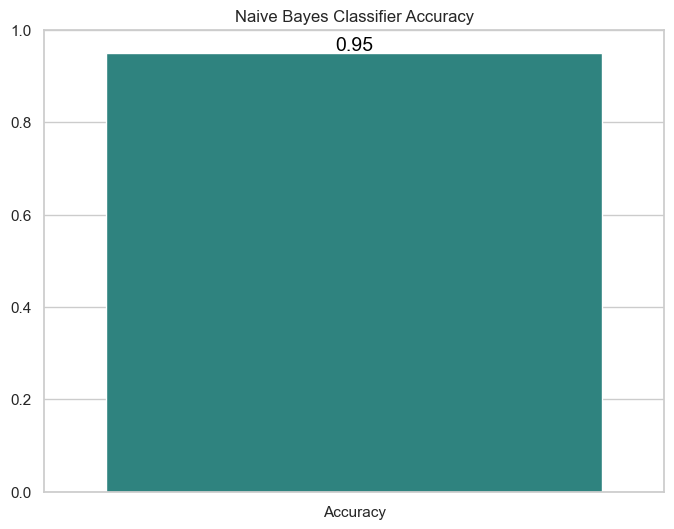

Accuracy: 0.9507692307692308
Classification Report:
               precision    recall  f1-score   support

           e       0.92      0.99      0.95       843
           p       0.99      0.91      0.95       782

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [39]:
classification_rep = classification_report(y_test, y_pred)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=["Accuracy"], y=[accuracy], palette="viridis")
ax.set(title="Naive Bayes Classifier Accuracy")
plt.ylim(0, 1.0)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

#### Foot note 

- `X_encoded = pd.get_dummies(X, columns=categorical_features)` is used to perform one-hot encoding on a data X by converting categorical (nominal) features into a set of binary (0 or 1) columns. <br>

- The `alpha` parameter is a positive real number that represents a "pseudocount" or a prior belief about the likelihood of observing each category or event. By adding this pseudocount to the observed counts of each category, Laplace smoothing ensures that no probability is ever zero and that each category has a non-zero probability of occurring.

- The value of alpha determines the strength of smoothing. A larger alpha means stronger smoothing, while a smaller alpha makes the smoothing effect weaker. Common values for alpha include `1.0 (Laplace smoothing)`, `0.5 (Lidstone smoothing)`, or smaller values when you want milder smoothing effects.

- The `laplace_smoothed_frequencies` function appears to be a function for calculating `Laplace-smoothed` (or Additive Smoothing) frequencies for categorical features in a dataset. It is used to estimate the probability of each category (or value) for each feature, addressing the issue of zero probabilities when specific categories are not observed in the training data.


- `regularizer = alpha * num_classes` The regularizer is the product of alpha and num_classes. It acts as a smoothing factor, adjusting the probability estimates for each category by adding a small amount to each count. This is necessary to ensure that no probability estimate becomes zero, even for categories that were not observed in the training data. The regularizer adds some level of uncertainty to each category's probability estimate. <br>

- `smoothed_frequencies = (feature_counts + alpha) / (total_samples + regularizer)`The smoothed_frequencies are computed by adding alpha to the feature counts and dividing by the sum of total_samples and the regularizer. This calculation ensures that the probability estimates for each category are never zero and are adjusted to reflect the additional "counts" introduced by the smoothing process.